In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

In [ ]:
#Reading all the files
ccd = pd.read_excel('CreditConsumptionData.xlsx')
cbd = pd.read_excel('CustomerBehaviorData.xlsx')
cd = pd.read_excel('CustomerDemographics.xlsx')

#merging all the file in a single file
cd2 = pd.merge(left=ccd,right=cd,how='left',on='ID')
data=pd.merge(left=cd2,right=cbd,how='left',on='ID')

In [ ]:
print(data['vehicle_loan_closed'].unique())
print(data['personal_loan_closed'].unique())
print(data['vehicle_loan_active'].unique())
print(data['personal_loan_active'].unique())
print(data['loan_enq'].unique())

In [ ]:
#Droping above columns because they are of no use
data.drop(columns={'loan_enq','vehicle_loan_closed','personal_loan_closed','vehicle_loan_active','personal_loan_active','region_code', 'Avg_days_between_transaction'},inplace=True)

In [44]:
#data.to_csv('data.csv',index=False)

Cleaning the data

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19287 entries, 0 to 19286
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19287 non-null  int64  
 1   cc_cons            14463 non-null  float64
 2   account_type       19287 non-null  int64  
 3   gender             19287 non-null  int64  
 4   age                19287 non-null  int64  
 5   Income             19287 non-null  float64
 6   Emp_Tenure_Years   19287 non-null  float64
 7   Tenure_with_Bank   19287 non-null  int64  
 8   NetBanking_Flag    19287 non-null  int64  
 9   card_lim           19287 non-null  int64  
 10  emi_active         19287 non-null  float64
 11  investment         19287 non-null  float64
 12  cc_cons_old        19287 non-null  float64
 13  dc_cons            19287 non-null  float64
 14  cc_count           19287 non-null  float64
 15  dc_count           19287 non-null  float64
 16  debit_amount       192

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

enc = OrdinalEncoder(categories=[['LOW','MEDIUM','HIGH']])
data['Income']=enc.fit_transform(data.loc[:,['Income']])

account_mapping = {'current':0,'saving':1}
data['account_type'] =data['account_type'].replace(account_mapping)

data['gender'] =LabelEncoder().fit_transform(data['gender'])

In [ ]:
# summing up the columns 
data["investment"]= data[['investment_1','investment_2','investment_3','investment_4']].sum(axis=1) 

# taking mean of the columns
data['cc_cons_old'] = data[['cc_cons_apr', 'cc_cons_may','cc_cons_jun']].mean(axis=1)
data['dc_cons'] = data[['dc_cons_apr', 'dc_cons_may','dc_cons_jun']].mean(axis=1)
data['cc_count'] = data[['cc_count_apr', 'cc_count_may','cc_count_jun']].mean(axis=1)
data['dc_count'] = data[['dc_count_apr', 'dc_count_may','dc_count_jun']].mean(axis=1)
data['debit_amount'] = data[['debit_amount_apr', 'debit_amount_may','debit_amount_jun']].mean(axis=1)
data['credit_amount'] = data[['credit_amount_apr', 'credit_amount_may','credit_amount_jun']].mean(axis=1)
data['max_credit_amount'] = data[['max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)
data['debit_count'] = data[['debit_count_apr', 'debit_count_may','debit_count_jun']].mean(axis=1)
data['credit_count'] = data[['credit_count_apr', 'credit_count_may','credit_count_jun']].mean(axis=1)

In [ ]:
cols_to_delete_1 = ['investment_1','investment_2','investment_3','investment_4','cc_cons_apr', 'cc_cons_may','cc_cons_jun',
                    'dc_cons_apr', 'dc_cons_may','dc_cons_jun','cc_count_apr', 'cc_count_may','cc_count_jun',
                    'dc_count_apr', 'dc_count_may','dc_count_jun','debit_amount_apr', 'debit_amount_may','debit_amount_jun',
                    'credit_amount_apr', 'credit_amount_may','credit_amount_jun',
                    'max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun','debit_count_apr',
                    'debit_count_may','debit_count_jun','credit_count_apr', 'credit_count_may','credit_count_jun']
data.drop(cols_to_delete_1, axis = 1, inplace = True)


In [8]:
data.shape

(19287, 21)

In [ ]:
#Removing null values from dataset
data.dropna(subset=['account_type', 'gender', 'age', 'Income',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'NetBanking_Flag', 'card_lim',
       'emi_active', 'investment', 'cc_cons_old', 'dc_cons', 'cc_count',
       'dc_count', 'debit_amount', 'credit_amount', 'max_credit_amount',
       'debit_count', 'credit_count'],inplace=True)

Removing OUTLIERS

In [ ]:
data.drop(data[(data['age']>75)].index,inplace=True)

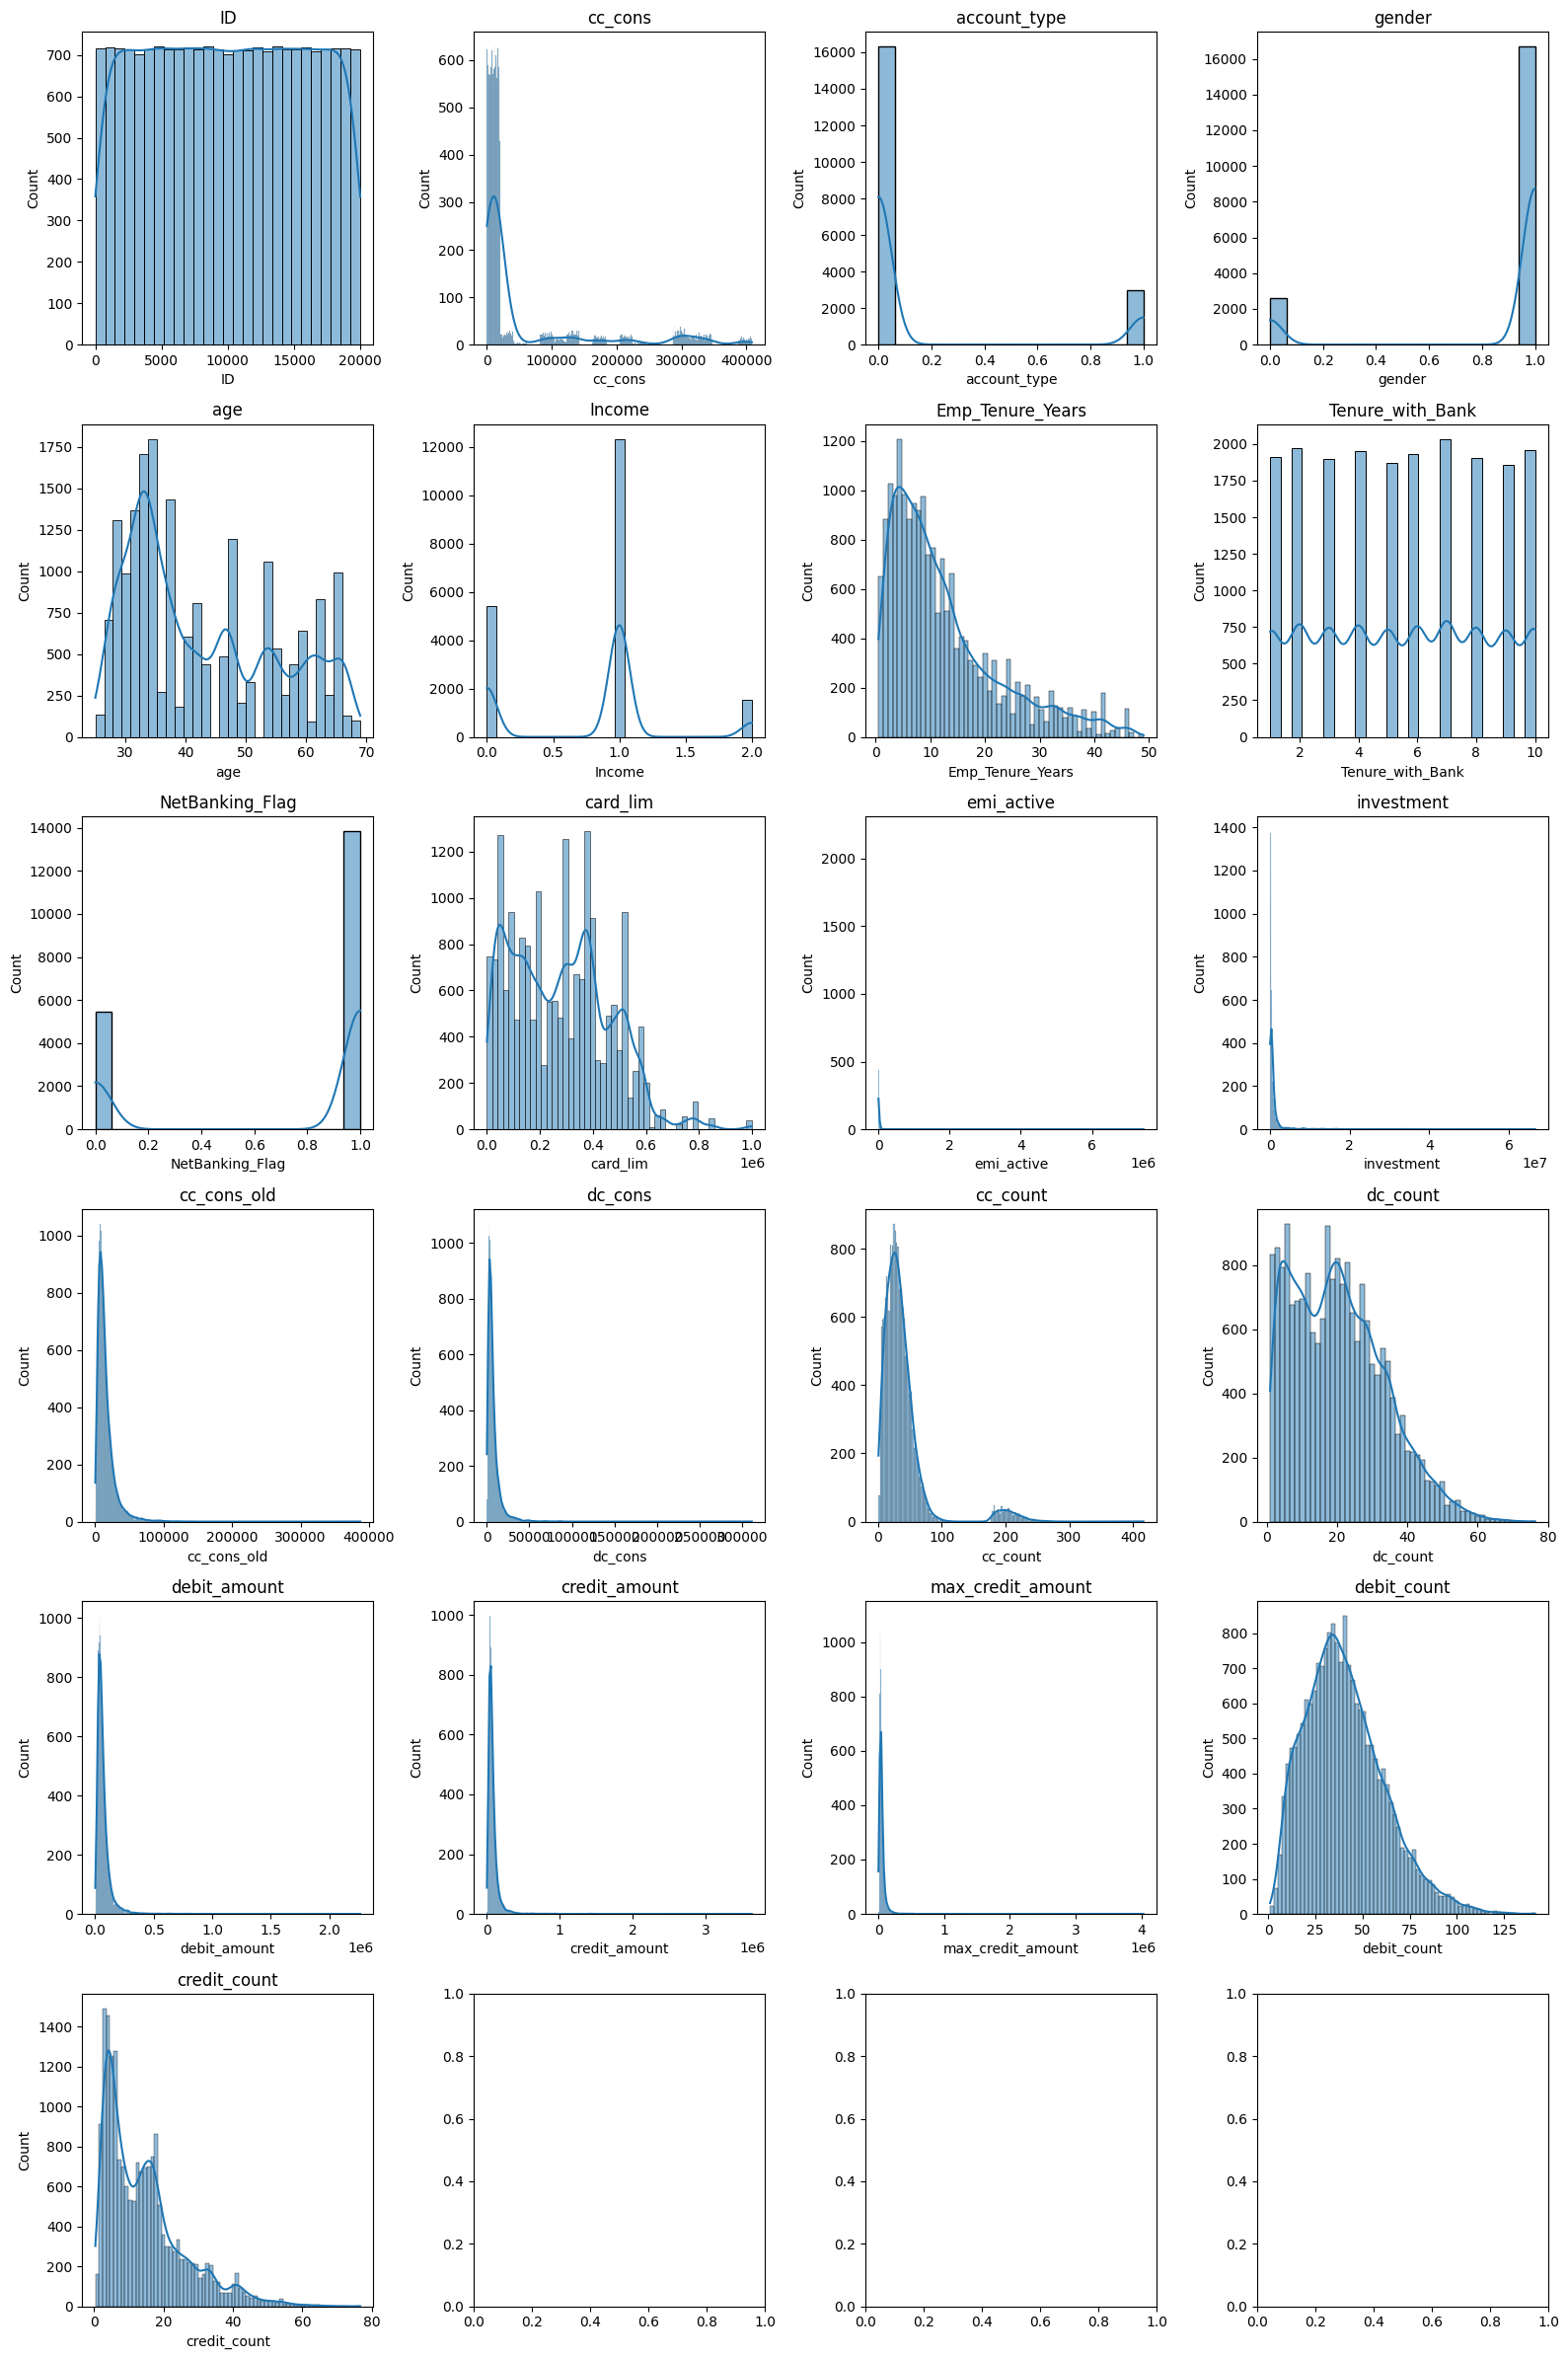

In [10]:
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1 
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i//4][i%4],kde=True)
    axes[i//4][i%4].set_title(col)
plt.tight_layout()
plt.show()



checking and correcting skewness of target variable

In [13]:
from scipy.stats import skew
print("Skewness of credit catd consumption is", data['cc_cons'].skew())

Skewness of credit catd consumption is 2.1293960225137867


In [14]:
target = data[14463:]
data = data[:14463]

In [15]:
data.set_index(['ID'],inplace=True)
target.set_index(['ID'],inplace=True)
target.drop(columns='cc_cons',inplace=True)

Standarizing the dataset

In [16]:
y=data.pop("cc_cons")
x=data

In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor,AdaBoostRegressor
from sklearn.svm import SVR 
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

models=[('Random Forest',RandomForestRegressor()),
        ('AdaBoost',AdaBoostRegressor()),
        ('BagginRegressor',BaggingRegressor()),
        ('SVR',SVR()),
        ('XGB',XGBRegressor()),
        ('GradientBoost',GradientBoostingRegressor()),
        ('Decision Tree',DecisionTreeRegressor()),
        ('Lasso',Lasso()),
        ('Linear',LinearRegression()),
        ('Ridge',Ridge())]


In [20]:
from sklearn.metrics import mean_squared_error


for name,model in (models):
        model.fit(x_train,y_train)
        rmse = mean_squared_error(y_test,model.predict(x_test), squared=False)

        print(name+ " has rmse ")
        print(rmse)

Random Forest has rmse 
98022.84811571191
AdaBoost has rmse 
101825.67360829496
BagginRegressor has rmse 
104602.57542733652
SVR has rmse 
102624.87949345728
XGB has rmse 
101160.94505298961
GradientBoost has rmse 
95149.93438280247
Decision Tree has rmse 
143491.34476297157
Lasso has rmse 
95020.6702509008
Linear has rmse 
95020.74595872095
Ridge has rmse 
95020.7459721451


In [21]:
y_predict = model.predict(scale.transform(target))
target['predict']=y_predict

In [27]:
target[['predict']]

,predict
ID,
17591,56544.986742
13541,56697.898258
13431,54289.141664
8687,55759.338146
14727,56349.278633
...,...
12512,55044.942758
14224,57888.774479
18740,53848.105456
